In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#读取相亲数据
date = pd.read_csv('C:/Users/acerpc/Desktop/date_data.csv')
date.head()

,income,attractive,assets,edueduclass,Dated,income_rank,attractive_rank,assets_rank
0,3000,9.0,5.145476,1,0,0,0,0
1,3000,14.5,40.643781,4,1,0,0,1
2,3000,6.0,5.145476,1,0,0,0,0
3,3000,1.0,7.067434,1,0,0,0,0
4,3500,14.5,3.728400,2,0,0,0,0


In [3]:
x = date.loc[:,'income':'assets']
y = date.Dated
train_data,test_data,train_target,test_target=train_test_split(x,y,test_size=0.2,random_state=0)

In [4]:
#建模
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(train_data,train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
test_est = logistic_model.predict(test_data)
train_est = logistic_model.predict(train_data)
test_est_p = logistic_model.predict_proba(test_data)[:,1]
train_est_p = logistic_model.predict_proba(train_data)[:,1]

In [21]:
pd.DataFrame({'test_target':test_target,'test_est':test_est}).T

,26,86,2,55,75,93,16,73,54,95,53,92,78,13,7,30,22,24,33,8
test_target,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0
test_est,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1


In [15]:
test_est_p

array([0.01201368, 0.44706141, 0.06479642, 0.99997547, 0.99900664,
       0.99999965, 0.00888953, 0.00130171, 0.84650844, 1.        ,
       0.97133747, 1.        , 0.99993613, 0.41421005, 0.07660447,
       0.65745377, 0.04951061, 0.02818201, 0.99931988, 0.60976157])

In [7]:
logistic_model.coef_#β

array([[-0.00106625, -0.03310541,  0.15096337]])

In [8]:
logistic_model.classes_#分类

array([0, 1], dtype=int64)

In [11]:
linear_model.LogisticRegression?#权重class_weight

In [12]:
logistic_model.score(train_data,train_target)#模型准确率

0.9625

In [13]:
logistic_model.score(test_data,test_target)#可能过拟合

0.8

In [17]:
logistic_model.intercept_

array([-0.04892094])

In [23]:
#决策（Decisions）类检验
print(metrics.classification_report(test_target,test_est))

             precision    recall  f1-score   support

          0       0.89      0.73      0.80        11
          1       0.73      0.89      0.80         9

avg / total       0.82      0.80      0.80        20



In [24]:
metrics.accuracy_score(test_target,test_est)

0.8

Text(0.5,1,'ROC curve')

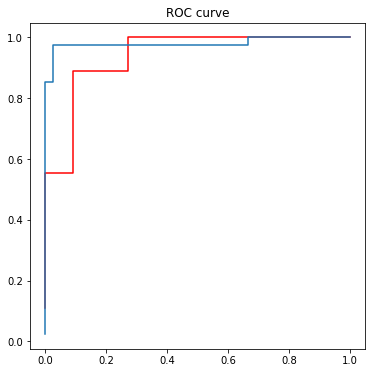

In [28]:
#排序（Rankings）类检验
#ROC曲线
fpr_test,tpr_test,th_test = metrics.roc_curve(test_target,test_est_p)
fpr_train,tpr_train,th_train = metrics.roc_curve(train_target,train_est_p)#th_阈值
plt.figure(figsize=(6,6))
plt.plot(fpr_test,tpr_test,color='r')
plt.plot(fpr_train,tpr_train)
plt.title('ROC curve')

In [29]:
test_auc = metrics.roc_auc_score(test_target,test_est_p)
train_auc = metrics.roc_auc_score(train_target,train_est_p)
print('test_auc',test_auc)
print('train_auc',train_auc)

test_auc 0.9393939393939394
train_auc 0.9806128830519074


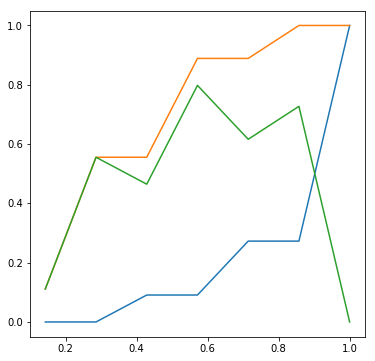

In [41]:
#KS曲线
fpr_test = np.array(fpr_test)
ks = tpr_test-fpr_test
ks_x = np.arange(1,len(ks)+1)/len(np.arange(1,len(ks)+1))
plt.figure(figsize=(6,6))
plt.plot(ks_x,fpr_test)
plt.plot(ks_x,tpr_test)
plt.plot(ks_x,ks)